In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/the-wildfire-dataset


In [2]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential


In [3]:
# Ensure GPU is present
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available!")

else:
    print("GPU is not available!")

GPU is available!


In [4]:
# Load and explore the dataset
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

In [5]:
# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['nofire', 'fire']


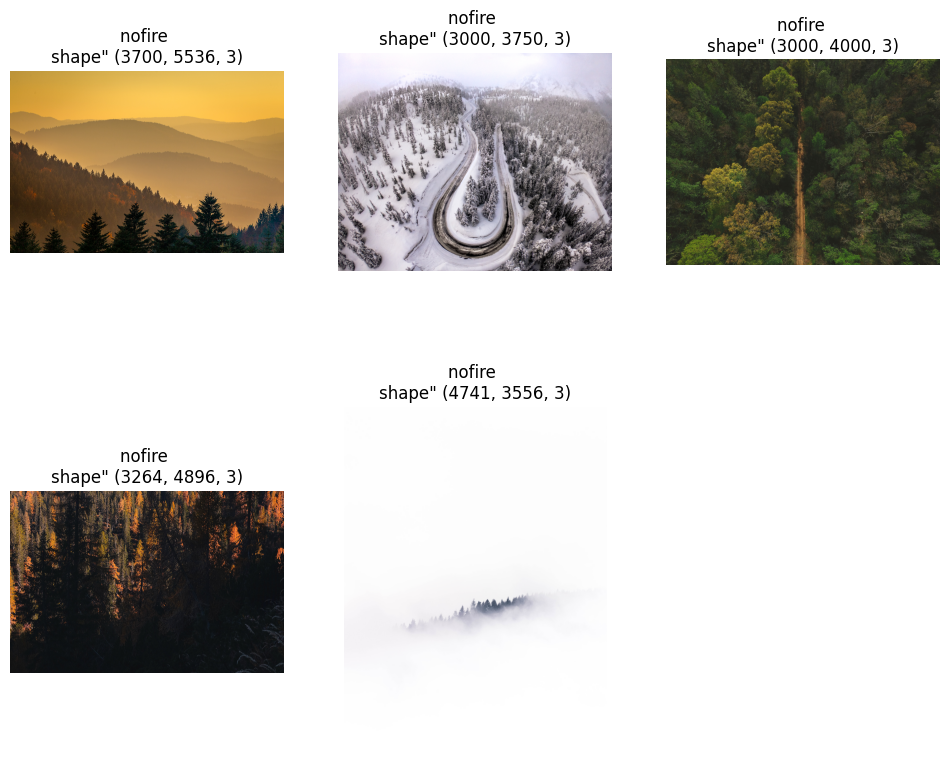

In [6]:
# Visualize images in dataset
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)
  plt.subplot(2, 3, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \nshape" {img.shape}')
  plt.axis('off')
plt.show()

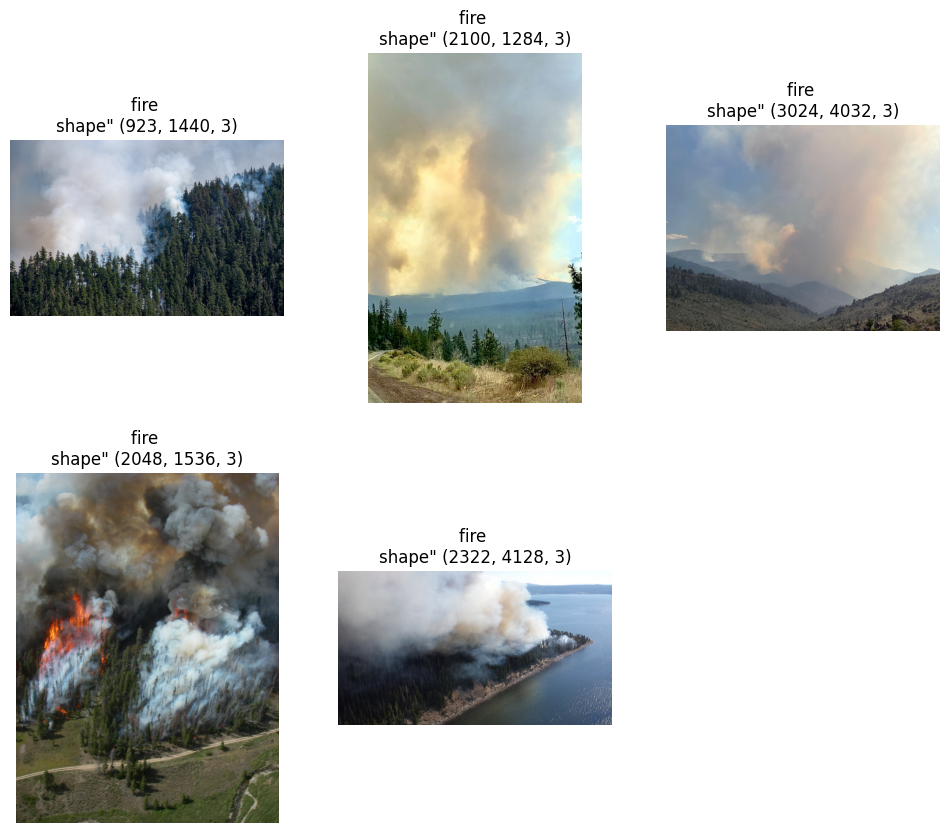

In [7]:
# Visualize images in dataset
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)
  plt.subplot(2, 3, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \nshape" {img.shape}')
  plt.axis('off')
plt.show()

In [8]:
# Preprocessing
# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32 # there will be 32 images in a batch!

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)


Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [9]:
# map the indices
class_mapping = train_generator.class_indices
# print(class_mapping)
# Extract the class names
class_names = list(class_mapping.keys())
print("Class Names:", class_names)

Class Names: ['fire', 'nofire']


In [10]:
# Let's build the CNN Model
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
)

In [11]:
model.compile(optimizer = "adam",
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary(0)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 10,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch_size)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 9/58 ━━━━━━━━━━━━━━━━━━━━ 4:45 6s/step - accuracy: 0.5487 - loss: 1.9732

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


40/58 ━━━━━━━━━━━━━━━━━━━━ 1:55 6s/step - accuracy: 0.6027 - loss: 1.2082

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


58/58 ━━━━━━━━━━━━━━━━━━━━ 482s 8s/step - accuracy: 0.6118 - loss: 1.0674 - val_accuracy: 0.7005 - val_loss: 0.5392
Epoch 2/10
 1/58 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5625 - loss: 0.6519

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.5625 - loss: 0.6519 - val_accuracy: 0.6823 - val_loss: 0.5439
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 499s 9s/step - accuracy: 0.7407 - loss: 0.5278 - val_accuracy: 0.7422 - val_loss: 0.4866
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.7500 - loss: 0.4432 - val_accuracy: 0.7604 - val_loss: 0.4921
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 508s 8s/step - accuracy: 0.7743 - loss: 0.4949 - val_accuracy: 0.7734 - val_loss: 0.4661
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8438 - loss: 0.4377 - val_accuracy: 0.7734 - val_loss: 0.4660
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 449s 8s/step - accuracy: 0.7703 - loss: 0.4699 - val_accuracy: 0.7474 - val_loss: 0.5067
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.8750 - loss: 0.2650 - val_accuracy: 0.7448 - val_loss: 0.5307
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 508s 9s/step - accuracy: 0.7611 - loss: 0.4910 - val_accuracy: 0.7786 - val_loss: 0.4494

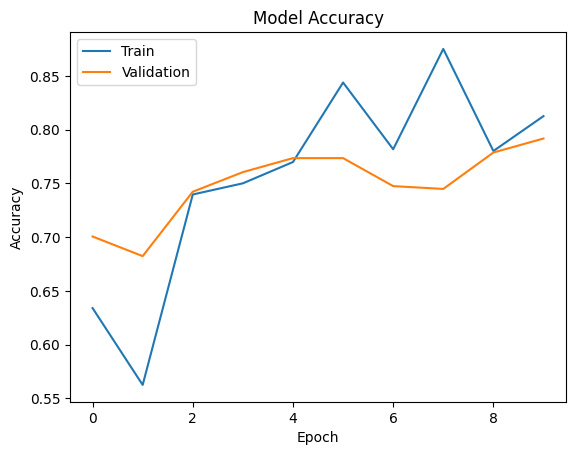

In [13]:
# Evaluate the model - plot training and validation accuracies

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

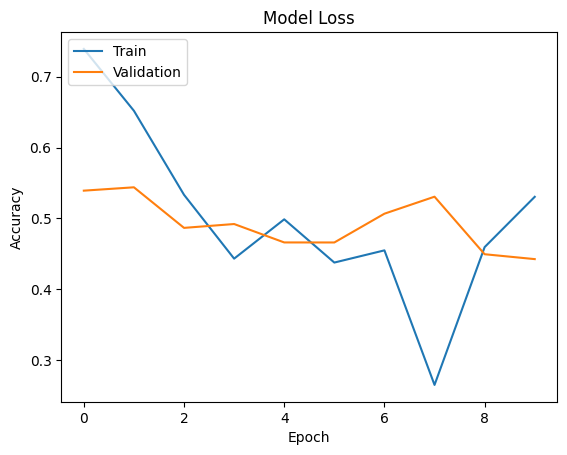

In [14]:
# Evaluate the model - plot training and validation accuracies

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

In [15]:
test_loss , test_acc = model.evaluate(test_generator, steps = test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc:.4f}')

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 1/12 ━━━━━━━━━━━━━━━━━━━━ 1:17 7s/step - accuracy: 0.7812 - loss: 0.3120

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 3/12 ━━━━━━━━━━━━━━━━━━━━ 1:01 7s/step - accuracy: 0.8351 - loss: 0.3021

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 87s 7s/step - accuracy: 0.8308 - loss: 0.3620
Test Accuracy: 0.8125


In [16]:
model.save('FFD.keras')

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load your trained model
model = load_model('FFD.keras')

# Define your class names (make sure this matches your training classes)
class_names = ['Fire', 'No Fire']  # Example — change if yours are different

def predict_fire(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize

    # Make prediction
    prediction = model.predict(img_array)

    # Interpret result
    if prediction[0] > 0.5:
        predicted_class = class_names[1]
    else:
        predicted_class = class_names[0]

    # Display image and prediction
    plt.imshow(img)
    plt.title(f'Prediction: {predicted_class}')
    plt.axis('off')
    plt.show()


In [18]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire')

['29071683967_b1ed99cb89_o.jpg',
 '9570772331_0822c9b670_o.jpg',
 'malachi-brooks-lhZ61YqYhnA-unsplash.jpg',
 '28537699003_1a422593ca_o.jpg',
 '51404893429_95e004cb03_o.jpg',
 '26131736898_9e6a8cd68f_o.jpg',
 '50622961901_b344261876_o.jpg',
 '35410741240_4dde737981_o.jpg',
 '20960888741_8c4be2c1df_o.jpg',
 '52230132421_efbcf13fe2_o.png',
 '52291063924_0a29bb857f_o.jpg',
 '9600858470_9d349a2271_o.jpg',
 '52390706166_2ef8a61765_o.jpg',
 '37342470222_39ab7a0005_o.jpg',
 '19196558588_267f24b847_o.jpg',
 '50622019883_c988dcf6ba_o.jpg',
 '33116128054_0169df2131_o.jpg',
 '32923781413_197187fc02_o.jpg',
 '50380847162_24a484981b_o.jpg',
 '52561565423_bbc7b2daf8_o.jpg',
 '27389369514_cd30397ac2_o.jpg',
 '51339519791_6c87189d8b_o.jpg',
 '26549039025_b4cce14ec7_o.jpg',
 '51840740529_300582b71b_o.jpg',
 '36171933842_96ffbd3205_o.jpg',
 '51236039150_95c87d9260_o.jpg',
 '8469662828_371dbcb70d_o.jpg',
 '52871185823_2561dcb25a_o.jpg',
 '28347651877_ce21ed134e_o.png',
 '35436611810_9b938fc10c_o.jpg',
 '

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


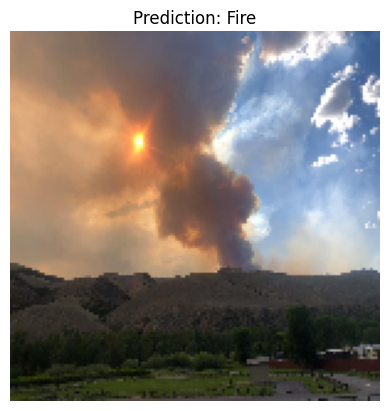

In [19]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/52258839816_bbb2d7b2ac_o.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


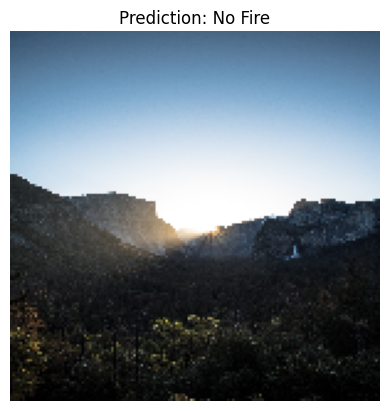

In [20]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/casey-horner-TI2iMeyOo-o-unsplash.jpg')

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Reset the generator to start from the beginning
test_generator.reset()

# Get true labels from the generator
y_true = test_generator.classes

# Predict probabilities
y_pred_prob = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)

# Convert predicted probabilities to binary class labels
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

# Print the evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))
test_loss, test_acc = model.evaluate(
    test_generator,
    steps=test_generator.samples // batch_size,
    verbose=1
)
print(f"\nFinal Test Accuracy: {test_acc * 100:.2f}%")



13/13 ━━━━━━━━━━━━━━━━━━━━ 93s 7s/step
Confusion Matrix:
[[ 52 107]
 [ 97 154]]

Classification Report:
              precision    recall  f1-score   support

        fire       0.35      0.33      0.34       159
      nofire       0.59      0.61      0.60       251

    accuracy                           0.50       410
   macro avg       0.47      0.47      0.47       410
weighted avg       0.50      0.50      0.50       410



/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 3/12 ━━━━━━━━━━━━━━━━━━━━ 55s 6s/step - accuracy: 0.8056 - loss: 0.4502 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 8/12 ━━━━━━━━━━━━━━━━━━━━ 26s 7s/step - accuracy: 0.8204 - loss: 0.4155

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 7s/step - accuracy: 0.8187 - loss: 0.4074

Final Test Accuracy: 81.25%
